<a href="https://colab.research.google.com/github/TanishqSharma2022/HEp2-Cell-Classification-Survey/blob/main/CoALBP-SVM/updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [11]:
!unrar x data.rar

Streaming output truncated to the last 5000 lines.
Extracting  ICPR_HEp2016/whole/NuMem_10707.png                            92%  OK 
Extracting  ICPR_HEp2016/whole/NuMem_10708.png                            92%  OK 
Extracting  ICPR_HEp2016/whole/NuMem_10709.png                            92%  OK 
Extracting  ICPR_HEp2016/whole/NuMem_10710.png                            92%  OK 
Extracting  ICPR_HEp2016/whole/NuMem_10711.png                            92%  OK 
Extracting  ICPR_HEp2016/whole/NuMem_10712.png                            92%  OK 
Extracting  ICPR_HEp2016/whole/NuMem_10713.png                            92%  OK 
Extracting  ICPR_HEp2016/whole/NuMem_10714.png                            92%  OK 
Extracting  ICPR_HEp2016/whole/NuMem_10715.png                            92%  OK 
Extracting  ICPR_HEp2016/whole/NuMem_10716.png                            92%  OK 
Extracting  ICPR_HEp2016/whol

# `Results on Main dataset with 28 images`

# No Feature Extraction

In [12]:
from PIL import Image, ImageFilter
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image

In [16]:


# Set the path to the main folder containing 28 subfolders
main_folder = r'MIVIA_HEp-2_Images_Dataset/Main_Dataset/Cells/Cell_Images'

# Mapping folder numbers (1-28) to 6 main classes
folder_to_class = {
    1: 1, 2: 2, 3: 3, 4: 4, 5: 1, 6: 5, 7: 3, 8: 4, 9: 2, 10: 5,
    11: 5, 12: 5, 13: 3, 14: 3, 15: 2, 16: 3, 17: 5, 18: 1, 19: 3,
    20: 4, 21: 1, 22: 1, 23: 2, 24: 4, 25: 6, 26: 6, 27: 6, 28: 6
}

# Function to load images and flatten pixel values from all 28 subfolders
def load_images_and_flatten(main_folder, image_size=(10, 10)):
    image_data = []
    labels = []
    for i in range(1, 29):  # Folders are numbered from 01 to 28
        folder_path = os.path.join(main_folder, f'{i:02d}')
        class_label = folder_to_class[i]  # Map the folder to the appropriate class
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize(image_size)  # Resize to a fixed size
            img_array = np.array(img).flatten()  # Flatten the image to a 1D array
            image_data.append(img_array)
            labels.append(class_label)  # Append the class label
    return np.array(image_data), np.array(labels)

# Load the dataset and extract pixel values
image_data, labels = load_images_and_flatten(main_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)


Accuracy: 48.45%
              precision    recall  f1-score   support

           1       0.43      0.60      0.50        75
           2       0.30      0.36      0.33        36
           3       0.64      0.65      0.65        69
           4       0.57      0.43      0.49        46
           5       0.44      0.27      0.33        45
           6       0.60      0.30      0.40        20

    accuracy                           0.48       291
   macro avg       0.50      0.44      0.45       291
weighted avg       0.50      0.48      0.48       291



In [17]:
len(X_train), len(X_test)

(1164, 291)

# LBP + SVM

In [18]:
import numpy as np
from skimage.feature import local_binary_pattern as lbp

def LBP(image, points=8, radius=1):
    '''
    Uniform Local Binary Patterns algorithm for one channel (2D image)
    Input image with shape (height, width)
    Output feature vector of length 59 (uniform LBP patterns)
    '''
    # calculate pattern length for uniform LBP (59 possible patterns for 'nri_uniform')
    length = 59

    # Apply LBP to the 2D grayscale image
    pattern = lbp(image, points, radius, method='nri_uniform')
    pattern = pattern.astype(np.int64).ravel()  # Flatten the LBP result
    pattern = np.bincount(pattern, minlength=length)  # Count occurrences of each pattern

    # Normalize the histogram and return it
    features = (pattern - np.mean(pattern)) / (np.std(pattern) + 1e-8)

    return features


In [19]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import local_binary_pattern
from PIL import Image

# Set the path to the main folder containing 28 subfolders
main_folder = r'MIVIA_HEp-2_Images_Dataset/Main_Dataset/Cells/Cell_Images'

# Mapping folder numbers (1-28) to 6 main classes
folder_to_class = {
    1: 1, 2: 2, 3: 3, 4: 4, 5: 1, 6: 5, 7: 3, 8: 4, 9: 2, 10: 5,
    11: 5, 12: 5, 13: 3, 14: 3, 15: 2, 16: 3, 17: 5, 18: 1, 19: 3,
    20: 4, 21: 1, 22: 1, 23: 2, 24: 4, 25: 6, 26: 6, 27: 6, 28: 6
}

# Function to load images and extract LBP histograms from all 28 subfolders
def load_images_and_extract_lbp(main_folder):
    lbp_histograms = []
    labels = []
    for i in range(1, 29):  # Folders are numbered from 01 to 28
        folder_path = os.path.join(main_folder, f'{i:02d}')
        class_label = folder_to_class[i]  # Map the folder to the appropriate class
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((64, 64))  # Resize to a fixed size
            img_array = np.array(img)  # Convert the image to a NumPy array

            # Extract LBP histogram
            lbp_hist = LBP(img_array)
            lbp_histograms.append(lbp_hist)
            labels.append(class_label)  # Append the class label
    return np.array(lbp_histograms), np.array(labels)

# Load the dataset and extract LBP histograms
lbp_histograms, labels = load_images_and_extract_lbp(main_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lbp_histograms, labels, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)


Accuracy: 69.07%
              precision    recall  f1-score   support

           1       0.68      0.68      0.68        75
           2       0.55      0.64      0.59        36
           3       0.71      0.80      0.75        69
           4       0.71      0.76      0.74        46
           5       0.72      0.58      0.64        45
           6       1.00      0.55      0.71        20

    accuracy                           0.69       291
   macro avg       0.73      0.67      0.68       291
weighted avg       0.70      0.69      0.69       291



# Co-occurence Among Local Binary Patterns + SVM

In [20]:
def CoALBP(image, lbp_r=1, co_r=2):
    '''
    Co-occurrence of Adjacent Local Binary Patterns algorithm for a single channel
    Input image with shape (height, width)
    Input lbp_r is radius for adjacent local binary patterns
    Input co_r is radius for co-occurrence of the patterns
    Output features with length 1024
    '''
    h, w = image.shape
    # normalize the image
    image = (image - np.mean(image)) / (np.std(image) + 1e-8)

    # Get the center pixels C
    C = image[lbp_r:h-lbp_r, lbp_r:w-lbp_r].astype(float)

    # Initialize the adjacent patterns array
    X = np.zeros((4, h-2*lbp_r, w-2*lbp_r))

    # adjacent local binary patterns
    X[0, :, :] = image[lbp_r  :h-lbp_r  , lbp_r+lbp_r:w-lbp_r+lbp_r] - C  # right
    X[1, :, :] = image[lbp_r-lbp_r:h-lbp_r-lbp_r, lbp_r  :w-lbp_r  ] - C  # top
    X[2, :, :] = image[lbp_r  :h-lbp_r  , lbp_r-lbp_r:w-lbp_r-lbp_r] - C  # left
    X[3, :, :] = image[lbp_r+lbp_r:h-lbp_r+lbp_r, lbp_r  :w-lbp_r  ] - C  # bottom

    # Apply the threshold to get binary values (LBP)
    X = (X > 0).reshape(4, -1)

    # Co-occurrence of the patterns
    A = np.dot(np.array([1, 2, 4, 8]), X)
    A = A.reshape(h-2*lbp_r, w-2*lbp_r) + 1

    # Calculate co-occurrence offsets
    hh, ww = A.shape
    D = (A[co_r:hh-co_r, co_r:ww-co_r] - 1) * 16 - 1

    # Compute co-occurrences in four directions
    Y1 = A[co_r:hh-co_r, co_r+co_r:ww-co_r+co_r] + D  # right
    Y2 = A[co_r-co_r:hh-co_r-co_r, co_r+co_r:ww-co_r+co_r] + D  # top-right
    Y3 = A[co_r-co_r:hh-co_r-co_r, co_r:ww-co_r] + D  # top
    Y4 = A[co_r-co_r:hh-co_r-co_r, co_r-co_r:ww-co_r-co_r] + D  # top-left

    # Compute histograms
    Y1 = np.bincount(Y1.ravel(), minlength=256)
    Y2 = np.bincount(Y2.ravel(), minlength=256)
    Y3 = np.bincount(Y3.ravel(), minlength=256)
    Y4 = np.bincount(Y4.ravel(), minlength=256)

    # Concatenate histograms from all directions
    pattern = np.concatenate((Y1, Y2, Y3, Y4))

    # Normalize the histogram and return it
    features = (pattern - np.mean(pattern)) / np.std(pattern)
    return features


In [21]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import local_binary_pattern
from PIL import Image

# Set the path to the main folder containing 28 subfolders
main_folder = r'MIVIA_HEp-2_Images_Dataset/Main_Dataset/Cells/Cell_Images'

# LBP Parameters
radius = 3  # Radius for LBP
n_points = 8 * radius  # Number of points to consider for LBP
n_bins = n_points + 2  # Number of bins for LBP histogram

# Mapping folder numbers (1-28) to 6 main classes
folder_to_class = {
    1: 1, 2: 2, 3: 3, 4: 4, 5: 1, 6: 5, 7: 3, 8: 4, 9: 2, 10: 5,
    11: 5, 12: 5, 13: 3, 14: 3, 15: 2, 16: 3, 17: 5, 18: 1, 19: 3,
    20: 4, 21: 1, 22: 1, 23: 2, 24: 4, 25: 6, 26: 6, 27: 6, 28: 6
}

# Function to compute LBP histogram features

# Function to load images and extract LBP histograms from all 28 subfolders
def load_images_and_extract_lbp(main_folder):
    lbp_histograms = []
    labels = []
    for i in range(1, 29):  # Folders are numbered from 01 to 28
        folder_path = os.path.join(main_folder, f'{i:02d}')
        class_label = folder_to_class[i]  # Map the folder to the appropriate class
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((64, 64))  # Resize to a fixed size
            img_array = np.array(img)  # Convert the image to a NumPy array

            # Extract LBP histogram
            lbp_hist = CoALBP(img_array)
            lbp_histograms.append(lbp_hist)
            labels.append(class_label)  # Append the class label
    return np.array(lbp_histograms), np.array(labels)

# Load the dataset and extract LBP histograms
lbp_histograms, labels = load_images_and_extract_lbp(main_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lbp_histograms, labels, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)


Accuracy: 86.25%
              precision    recall  f1-score   support

           1       0.89      0.88      0.89        75
           2       0.66      0.69      0.68        36
           3       0.91      0.91      0.91        69
           4       0.85      0.89      0.87        46
           5       0.88      0.93      0.90        45
           6       1.00      0.70      0.82        20

    accuracy                           0.86       291
   macro avg       0.87      0.84      0.85       291
weighted avg       0.87      0.86      0.86       291



# `Results on ICPR 2012 Dataset`

In [22]:
import os

In [23]:
import pandas as pd

# Load the CSV file
csv_file_path = 'MIVIA_HEp-2_Images_Dataset/ICPR2012_Cells_Classification_Contest/cells.csv'  # Change this to your CSV file path
data = pd.read_csv(csv_file_path, sep=";")  # Use sep=';' to handle the semicolon delimiter

data


,ICPR2012Contest_Cell_ID,Set,Image,Intensity,Original_cell_ID,Cell_class,Cell_width,Cell_height
0,1,training,18,positive,30,homogeneous,67,98
1,2,training,6,positive,14,coarse_speckled,83,76
2,3,training,1,positive,54,homogeneous,94,80
3,4,training,8,positive,25,nucleolar,96,72
4,5,training,8,positive,32,nucleolar,82,83
...,...,...,...,...,...,...,...,...
1450,730,test,22,positive,48,homogeneous,74,82
1451,731,test,27,positive,17,cytoplasmatic,78,209
1452,732,test,24,positive,47,nucleolar,85,97
1453,733,test,27,positive,43,cytoplasmatic,78,91


In [24]:
# Separate the data into training and testing sets
training_data = data[data['Set'] == 'training']
testing_data = data[data['Set'] == 'test']

# Display the shapes of the training and testing sets
print("Training data shape:", training_data.shape)
print("Testing data shape:", testing_data.shape)

# Example of accessing specific columns
training_images = training_data['ICPR2012Contest_Cell_ID'].tolist()  # List of training images
training_classes = training_data['Cell_class'].tolist()  # List of cell classes for training images

testing_images = testing_data['ICPR2012Contest_Cell_ID'].tolist()  # List of testing images
testing_classes = testing_data['Cell_class'].tolist()  # List of cell classes for testing images

# Display the lists
print("Training images:", training_images)
print("Training classes:", training_classes)
print("Testing images:", testing_images)
print("Testing classes:", testing_classes)


Training data shape: (721, 8)
Testing data shape: (734, 8)
Training images: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 2

In [25]:
"""
    Homogenous: 1
    Fine Speckled: 2
    Centromere: 3
    Nucleolar: 4
    Coarse Speckled: 5
    Cytoplasmic: 6
"""

'\n    Homogenous: 1\n    Fine Speckled: 2\n    Centromere: 3\n    Nucleolar: 4\n    Coarse Speckled: 5\n    Cytoplasmic: 6\n'

In [26]:
def string_to_label(label):
    match label:
        case "homogeneous":
            return 1
        case "fine_speckled":
            return 2
        case "centromere":
            return 3
        case "nucleolar":
            return 4
        case "coarse_speckled":
            return 5
        case "cytoplasmatic":
            return 6
        case _:
            return "No Match"




In [27]:
training_path = "MIVIA_HEp-2_Images_Dataset/ICPR2012_Cells_Classification_Contest/training"
testing_path = "MIVIA_HEp-2_Images_Dataset/ICPR2012_Cells_Classification_Contest/test"

In [28]:
def load_images(main_folder, images, classes):
    img_data = []
    labels = []
    for i in range(len(images)):  # Folders are numbered from 01 to 28
        folder_path = os.path.join(main_folder, f'{images[i]:03d}.png')
        class_label = classes[i]  # Map the folder to the appropriate class
        # print(folder_path, string_to_label(class_label), class_label)
        # img_path = os.path.join(folder_path, img_name)
        # for img_name in os.listdir(folder_path):
        img = Image.open(folder_path).convert('L')
        img = img.resize((64, 64))  # Resize to a fixed size
        img_array = np.array(img)
        img = img.filter(ImageFilter.GaussianBlur(radius=1))
        img_array = img_array.flatten()
        img_data.append(img_array)
        labels.append(string_to_label(class_label))
    return img_data, labels
          # Convert to grayscale

In [29]:
training_data, training_labels = load_images(training_path, training_images, training_classes)
testing_data, testing_labels = load_images(testing_path, testing_images, testing_classes)

In [30]:
len(training_data), len(training_labels)

(721, 721)

In [31]:
training_data[0].shape

(4096,)

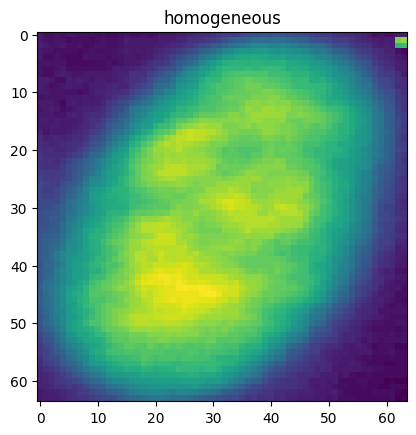

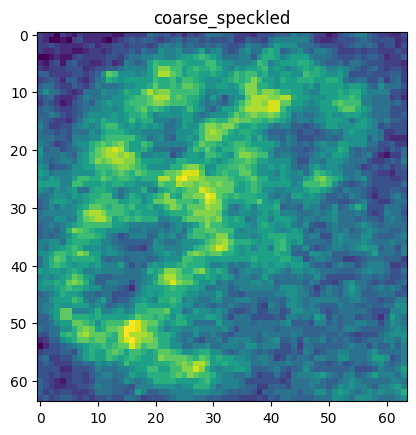

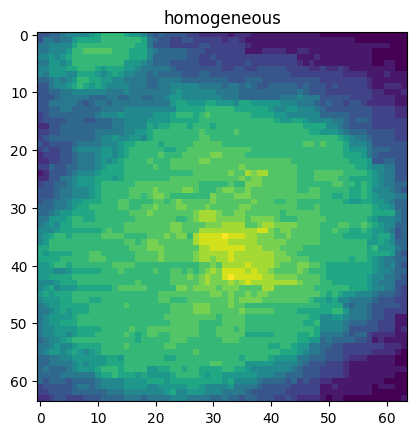

In [32]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0].reshape((64, 64)))
plt.title(training_classes[0])
plt.show()
plt.imshow(training_data[10].reshape((64, 64)))
plt.title(training_classes[10])
plt.show()
plt.imshow(training_data[20].reshape((64, 64)))
plt.title(training_classes[20])
plt.show()

In [33]:
len(testing_data), len(testing_labels)

(734, 734)

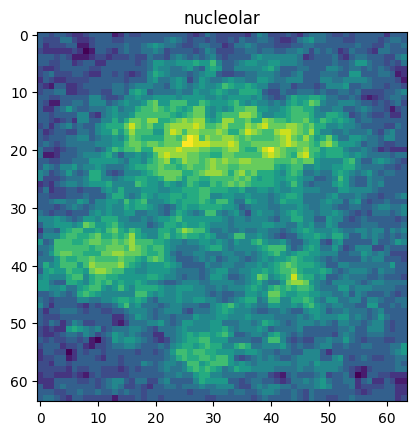

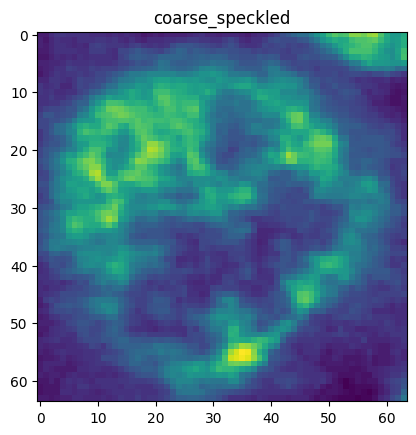

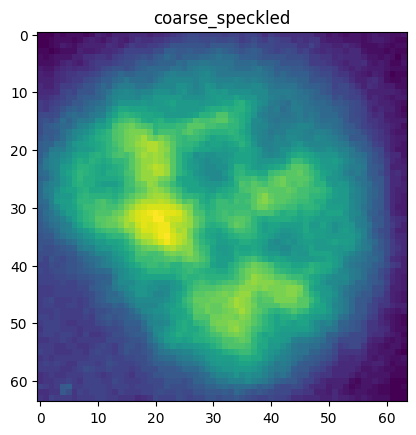

In [34]:
plt.imshow(testing_data[0].reshape((64, 64)))
plt.title(testing_classes[0])
plt.show()
plt.imshow(testing_data[10].reshape((64, 64)))
plt.title(testing_classes[10])
plt.show()
plt.imshow(testing_data[20].reshape((64, 64)))
plt.title(testing_classes[20])
plt.show()

# No Feature Extraction

In [35]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(training_data, training_classes)

# Predict on the test set
y_pred = clf.predict(testing_data)

# Evaluate the classifier
accuracy = accuracy_score(testing_classes, y_pred)
report = classification_report(testing_classes, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)

Accuracy: 30.38%
                 precision    recall  f1-score   support

     centromere       0.49      0.50      0.49       149
coarse_speckled       0.31      0.42      0.35       101
  cytoplasmatic       0.20      0.39      0.27        51
  fine_speckled       0.19      0.20      0.19       114
    homogeneous       0.39      0.34      0.36       180
      nucleolar       0.03      0.01      0.02       139

       accuracy                           0.30       734
      macro avg       0.27      0.31      0.28       734
   weighted avg       0.29      0.30      0.29       734



# LBP + SVM

In [36]:
def load_images(main_folder, images, classes):
    img_data = []
    labels = []
    for i in range(len(images)):  # Folders are numbered from 01 to 28
        folder_path = os.path.join(main_folder, f'{images[i]:03d}.png')
        class_label = classes[i]  # Map the folder to the appropriate class
        # print(folder_path, string_to_label(class_label), class_label)
        # img_path = os.path.join(folder_path, img_name)
        # for img_name in os.listdir(folder_path):
        img = Image.open(folder_path).convert('L')
        img = img.resize((64, 64))
        img = img.filter(ImageFilter.GaussianBlur(radius=1))
          # Resize to a fixed size
        img_array = np.array(img)
        # img_array = img_array.flatten()

        lbp_hist = LBP(img_array)
        img_data.append(lbp_hist)
        labels.append(string_to_label(class_label))
    return img_data, np.array(labels)
          # Convert to grayscale

In [37]:
training_data, training_labels = load_images(training_path, training_images, training_classes)
testing_data, testing_labels = load_images(testing_path, testing_images, testing_classes)

In [38]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear', max_iter=500)

# Train the classifier
clf.fit(training_data, training_classes)

# Predict on the test set
y_pred = clf.predict(testing_data)

# Evaluate the classifier
accuracy = accuracy_score(testing_classes, y_pred)
report = classification_report(testing_classes, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)

Accuracy: 44.41%
                 precision    recall  f1-score   support

     centromere       0.37      0.64      0.47       149
coarse_speckled       0.44      0.62      0.52       101
  cytoplasmatic       0.44      0.39      0.42        51
  fine_speckled       0.31      0.30      0.30       114
    homogeneous       0.66      0.30      0.41       180
      nucleolar       0.63      0.42      0.51       139

       accuracy                           0.44       734
      macro avg       0.48      0.45      0.44       734
   weighted avg       0.50      0.44      0.44       734



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


<!-- # CoALBP + SVM -->

# CoALBP + SVM

In [39]:
def load_images(main_folder, images, classes):
    img_data = []
    labels = []
    for i in range(len(images)):  # Folders are numbered from 01 to 28
        folder_path = os.path.join(main_folder, f'{images[i]:03d}.png')
        class_label = classes[i]  # Map the folder to the appropriate class
        # print(folder_path, string_to_label(class_label), class_label)
        # img_path = os.path.join(folder_path, img_name)
        # for img_name in os.listdir(folder_path):
        image = Image.open(folder_path).convert('L')
        img = image.resize((45, 45))  # Resize to a fixed size
        img = img.filter(ImageFilter.GaussianBlur(radius=1))
        img_array = np.array(img)


        lbp_hist = CoALBP(img_array)

        # img_array = img_array.flatten()
        img_data.append(lbp_hist)
        labels.append(string_to_label(class_label))
    return img_data, np.array(labels)
          # Convert to grayscale

In [40]:
training_data, training_labels = load_images(training_path, training_images, training_classes)
testing_data, testing_labels = load_images(testing_path, testing_images, testing_classes)

In [41]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear', max_iter=100)

# Train the classifier
clf.fit(training_data, training_classes)

# Predict on the test set
y_pred = clf.predict(testing_data)

# Evaluate the classifier
accuracy = accuracy_score(testing_classes, y_pred)
report = classification_report(testing_classes, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)

Accuracy: 66.35%
                 precision    recall  f1-score   support

     centromere       0.68      0.81      0.74       149
coarse_speckled       0.68      0.70      0.69       101
  cytoplasmatic       0.57      0.90      0.70        51
  fine_speckled       0.48      0.51      0.49       114
    homogeneous       0.76      0.50      0.60       180
      nucleolar       0.76      0.73      0.74       139

       accuracy                           0.66       734
      macro avg       0.66      0.69      0.66       734
   weighted avg       0.68      0.66      0.66       734



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# `ICPR 2016 Dataset`

In [42]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

In [43]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [45]:
from utils import string_to_target

In [46]:
def load_images_whole(main_folder):
    labels = []
    images = []
    path = 'ICPR_HEp2016/whole'
    for image_name in os.listdir(path):
        target, name = image_name.split(sep="_")
        folder_path = os.path.join(main_folder,"whole", image_name)
        # print(folder_path, target, string_to_target(target))
        img = Image.open(folder_path).convert('L')
        img = img.resize((64, 64))  # Resize to a fixed size
        img_array = np.array(img)
        img = img.filter(ImageFilter.GaussianBlur(radius=1))
        img_array = img_array.flatten()
        images.append(img_array)

        labels.append(string_to_target(target))
    return images, labels

In [47]:
i3a_image_path = "ICPR_HEp2016/"

image, target = (load_images_whole(i3a_image_path))


In [48]:
len(image), len(target)

(13596, 13596)

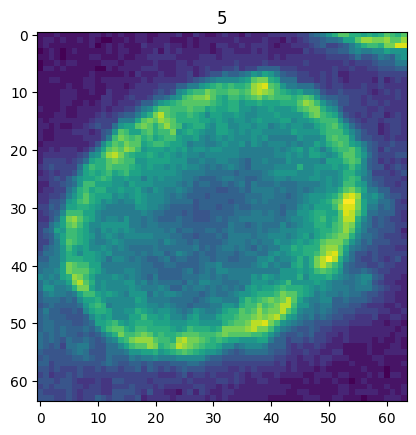

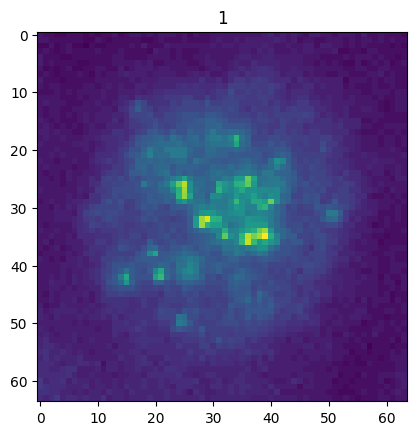

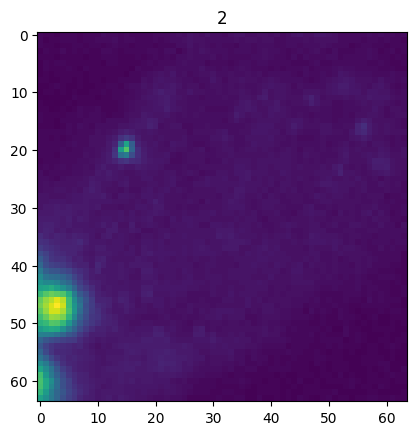

In [49]:
import matplotlib.pyplot as plt
plt.imshow(image[0].reshape((64, 64)))
plt.title(target[0])
plt.show()
plt.imshow(image[4000].reshape((64, 64)))
plt.title(target[4000])
plt.show()
plt.imshow(image[5000].reshape((64, 64)))
plt.title(target[5000])
plt.show()

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.model_selection import train_test_split

# Assuming `image` is a list or array of 13596 images
# and `target` is a list or array of corresponding labels from 1 to 6

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    image, target, test_size=0.2, random_state=42  # Adjust test_size as needed
)

# Check the shapes to confirm
print(f"Training set: {len(X_train)} images, {len(y_train)} labels")
print(f"Testing set: {len(X_test)} images, {len(y_test)} labels")

Training set: 10876 images, 10876 labels
Testing set: 2720 images, 2720 labels


In [52]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],  # only relevant for poly kernel
    'coef0': [0, 1, 10]  # independent term in poly/sigmoid kernel
}

In [54]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC()
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid
)
# Train the classifier
grid_search.fit(X_train, y_train)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Best Parameters: ", grid_search.best_params_)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(report)

InvalidParameterError: The 'cv' parameter of GridSearchCV must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.